In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Read the CSV file "HR.csv" from the specified path into a pandas DataFrame
df = pd.read_csv("/content/HR.csv")
# Display the first 5 rows of the DataFrame to quickly inspect the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
# Select the features that seem to have a clear impact
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'Work_accident',
            'promotion_last_5years', 'salary', 'Department']
X = df[features]
y = df['left']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['salary', 'Department'], drop_first=True)

X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,True,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,False,True,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,False,True,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,True,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,True,False,False,False,False,False,False,False,True,False,False


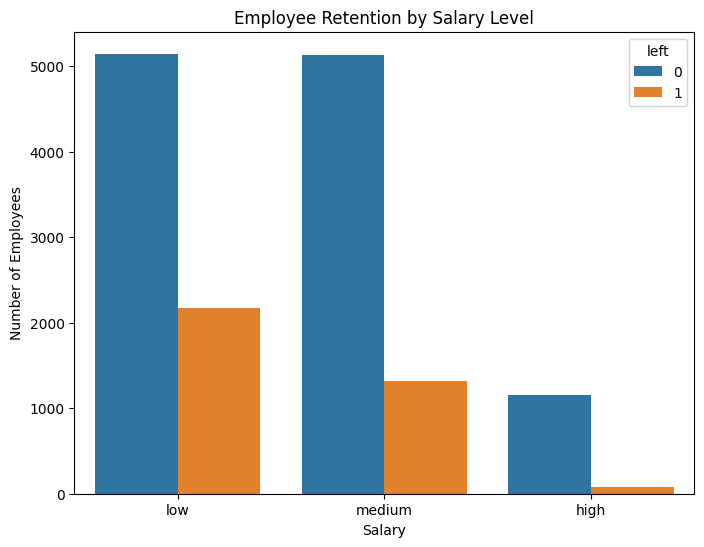

In [ ]:
# Count plot of employees by salary level with 'left' status as hue, showing employee retention patterns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='salary', hue='left')
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

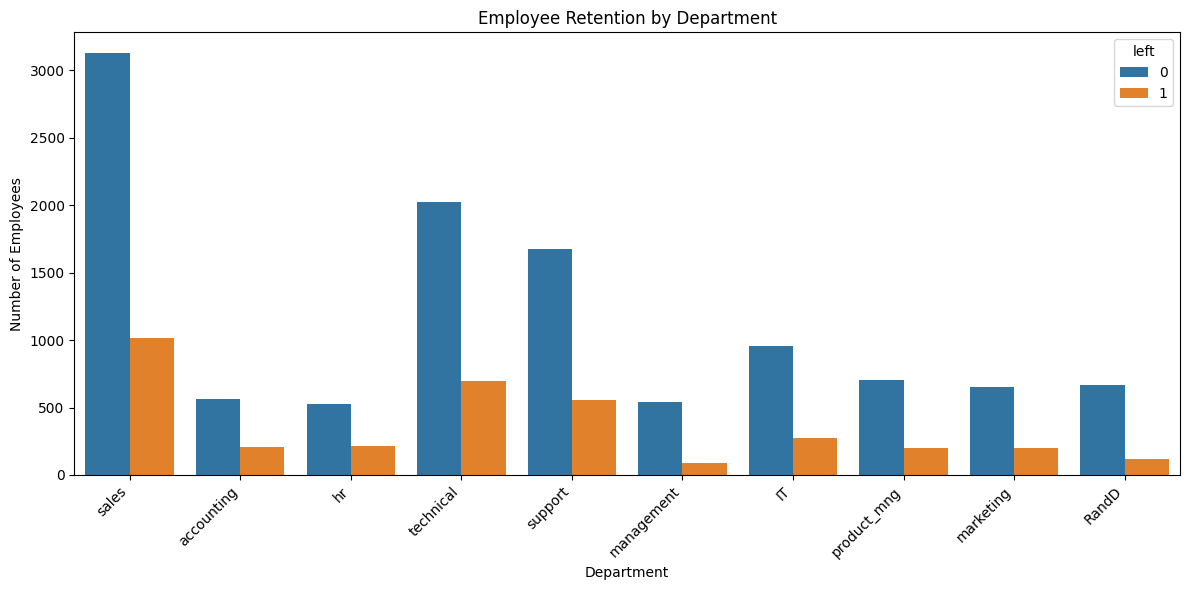

In [ ]:
# Count plot of employees by department with 'left' status as hue, showing retention patterns across departments
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Department', hue='left')
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Return the accuracy score of the logistic regression model on the test dataset
model.score(X_test, y_test)

0.7823333333333333